<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла.<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [2]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    kernel = 'linear'

    model = SVC(kernel=kernel)
    print "Trying model {}".format(model)
    
    accuracy = np.mean(cross_val_score(model, x, y))

    best_model = model
    best_accuracy = accuracy
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [3]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.910539
Plotting data set points
Plotting decision region


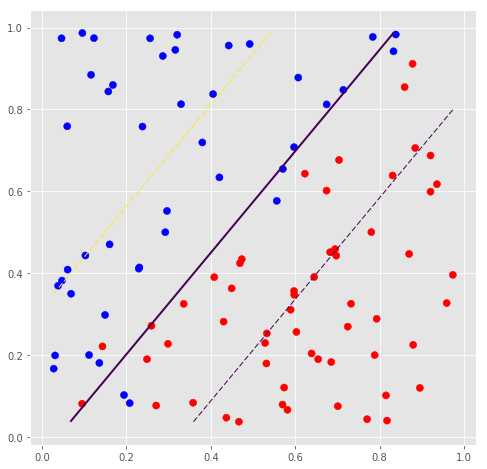

In [4]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.451593
Plotting data set points
Plotting decision region


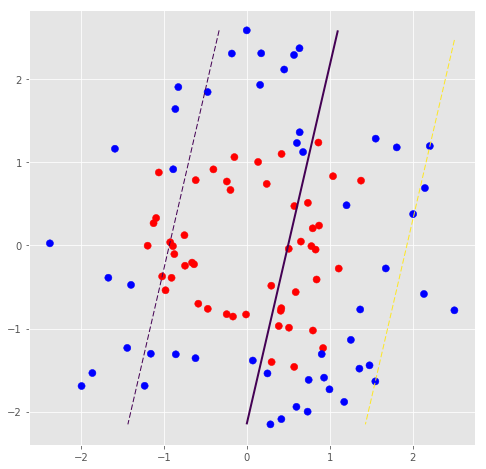

In [5]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set
Trying model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best model SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.705186
Plotting data set points
Plotting decision region


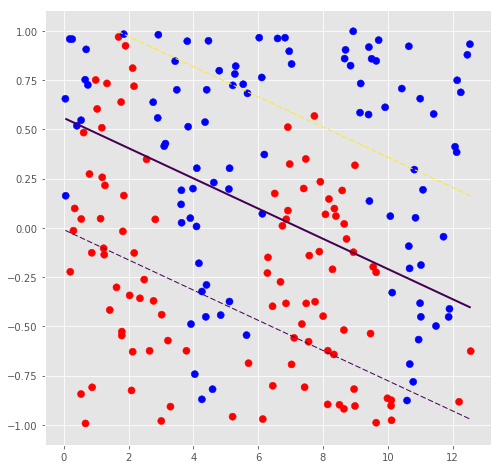

In [6]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

Plotting data set points


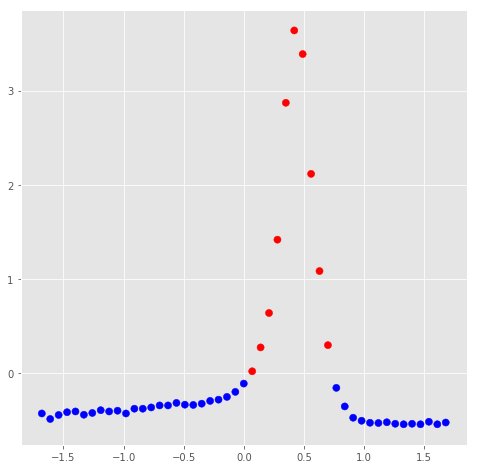

In [7]:
df_titanium = pd.read_csv('titanium.csv')
(_, x), (_, y) = df_titanium.iteritems()
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), np.where(y < 0, 1, 0))

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
def select_model(x, y, kernel='rbf', degree=3, gamma='auto', coef0=0.0):
    best_accuracy = 0
    best_model = None
    coeffs = np.logspace(-2, 2, 10)
    losses = []
    for C in coeffs:
        model = SVR(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, C=C, epsilon=0.01)
        model.fit(pd.concat((x,), axis='columns'), y)
        losses.append(mean_absolute_error(y, model.predict(pd.concat((x,), axis='columns'))))
        if best_model is None or losses[-1] < best_accuracy:
            best_accuracy = losses[-1]
            best_model = model
    plt.plot(coeffs, losses)
    plt.legend(['loss'])
    plt.title('Mean absolute error of {} model'.format(kernel))
    plt.xlabel('C')
    plt.xscale('log')
    plt.ylabel('MAE')
    return best_model

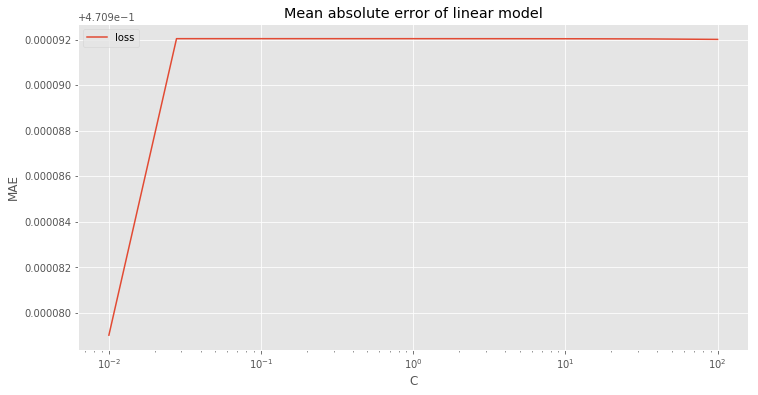

In [10]:
regr = select_model(x, y, kernel='linear')

Plotting data set points


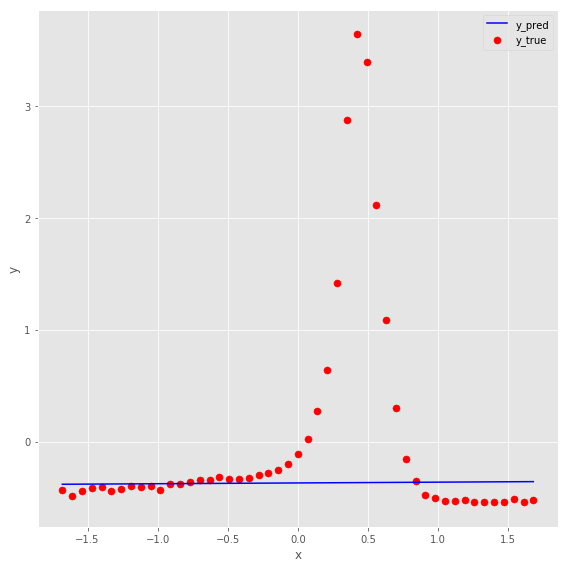

In [11]:
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

В силу простоты линейной модели, эффектов переобучения и недообучения при изменении парметра C не возникает. Оптимальным значением параметра для лучшей модели следует выбирать точку минимума функции ошибки. 

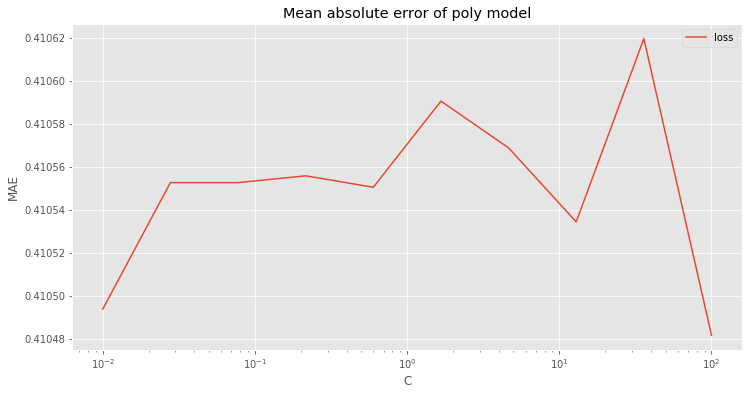

In [12]:
regr = select_model(x, y, kernel='poly', gamma=6, coef0=1)

Plotting data set points


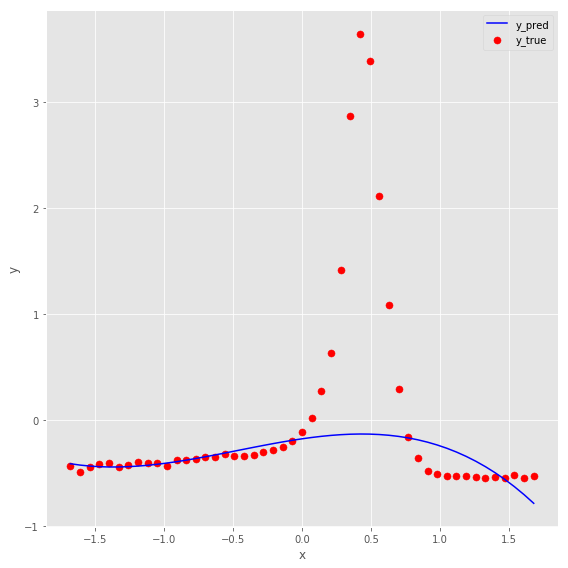

In [13]:
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

Для поминомиальной во целях избежания эффектов переобучения и недообучения выберем оптимальное значение C = 12.91549665.

Plotting data set points


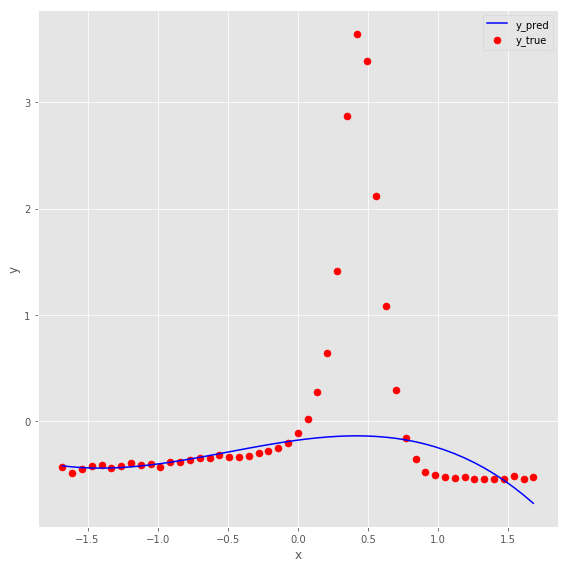

In [14]:
regr = SVR(kernel='poly', gamma=6, coef0=1, C=1, epsilon=0.01)
regr.fit(pd.concat((x,), axis='columns'), y)
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

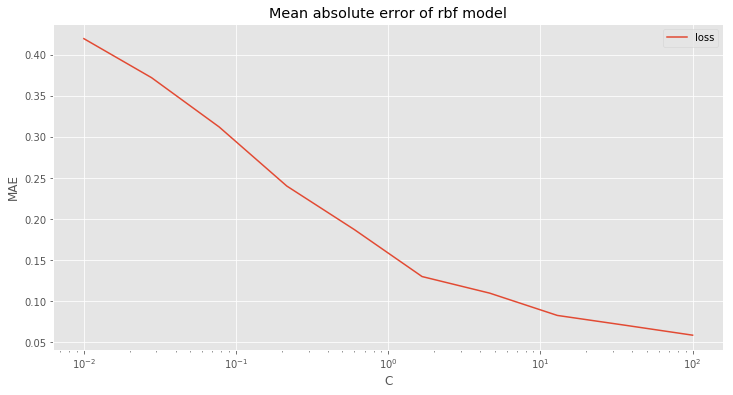

In [15]:
regr = select_model(x, y, gamma=6, coef0=1)

Plotting data set points


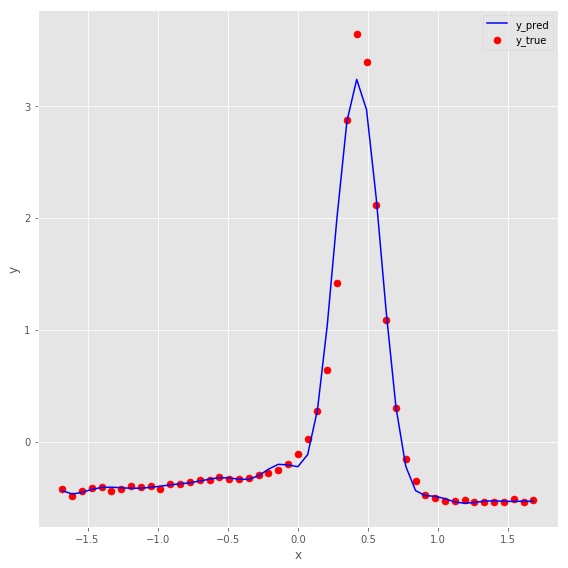

In [16]:
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

Значение параметра C, в котором достается наименьшее значение ошибки, обеспечивает сильное переобучение и не может быть использовано для работы на реальных данных. Отыскание оптимального значения параметра C следует делать через поиск локального минимума скорости убывания функции ошибки. В данном случае оптимальным значением является C = 4.64158883.

Plotting data set points


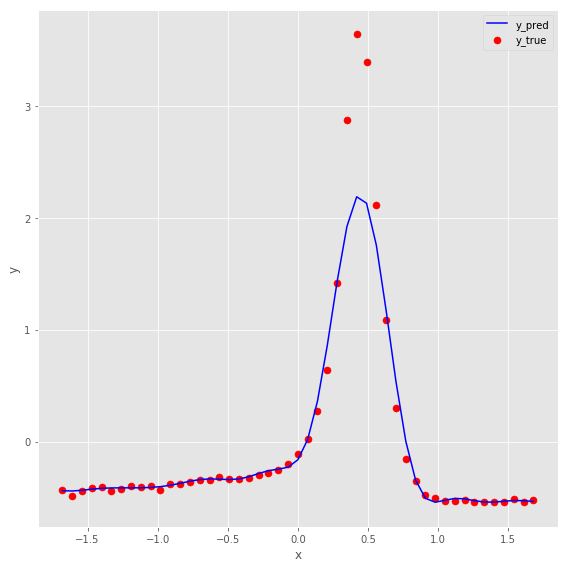

In [17]:
regr = SVR(gamma=6, coef0=1, C=4.64158883, epsilon=0.01)
regr.fit(pd.concat((x,), axis='columns'), y)
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

Данная модель также испытывает эффекты недообучения при небольших парметрах C. Далее будет продемоснтрирован этот эффект. Стоит отметить, что в таком случае качество предсказания даже на обучающей выборке не многим лучше, чем у линейной модели.

Plotting data set points


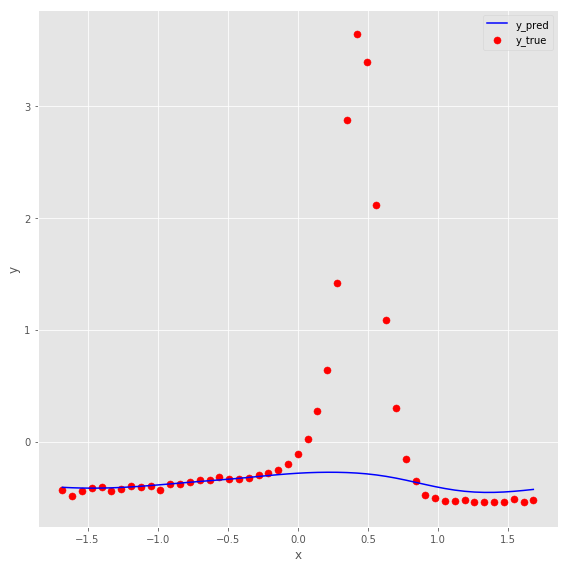

In [18]:
regr = SVR(gamma=6, coef0=1, C=0.01, epsilon=0.01)
regr.fit(pd.concat((x,), axis='columns'), y)
y_pred = y.copy()
y_pred[:] = regr.predict(pd.concat((x,), axis='columns'))
plot_data_set(np.asarray(pd.concat((x, y), axis='columns')), 0)
plt.plot(x, y_pred, c='b')
plt.legend(['y_pred', 'y_true'])
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [19]:
df_war_and_peace_en = pd.read_csv('war_and_peace_en.txt', names=['word'])
df_war_and_peace_en['label'] = 0
df_war_and_peace_es = pd.read_csv('war_and_peace_es.txt', names=['word'])
df_war_and_peace_es['label'] = 1
df = pd.concat((df_war_and_peace_en, df_war_and_peace_es))
df.reset_index(drop=True, inplace=True)
df.rename_axis('index', inplace=True)
del df_war_and_peace_es
del df_war_and_peace_en

In [20]:
# like this

df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
RND_SEED = 2017

In [23]:
df = df.sample(frac=1, random_state=RND_SEED)
df.reset_index(drop=True, inplace=True)
df.head()

,word,label
0,tazza,1
1,tono,1
2,conoscete,1
3,personnellement,1
4,come,1


In [24]:
X, y = np.reshape(df.index.values, (-1, 1)), df.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [25]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0
    
    len_1 = len(string_1)
    len_2 = len(string_2)
    
    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1
    
    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2
    
    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]
    
    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]
            
            if string_1[i] != string_2[j]:
                # substitution
                cost += 1
                
                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost
                
                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost
                
            d1[j + 1] = cost
            
        d0, d1 = d1, d0
        
    return d0[-1]

In [26]:
from tqdm import tqdm

def string_kernel(U, V):
    G = np.empty((U.shape[0], V.shape[0]))
    for i in tqdm(xrange(G.shape[0])):
        for j in xrange(G.shape[1]):
            G[i, j] = wfi_levenshtein(df.loc[U[i, 0]].word, df.loc[V[j, 0]].word)
    return np.exp(-0.01 * G ** 2)

G = string_kernel(X, X)

100%|██████████| 11403/11403 [12:36:06<00:00,  3.42s/it]  


Чтобы не производить лишние вычисления, матрицу ядра G можно предпосчитать заранее для всех слов, а не только для тренировочной выборки. Это позволит реализовать гораздо более быструю версию функции построения ядра в виде подматрицы глобальной матрицы для тренировочной и контрольной выборки соответственно. Так построение модели может быть выполнено для всех слов за адекватное время.

In [27]:
def string_kernel_faster(U, V):
    global G
    return G[U[:, 0].astype(int)][:, V[:, 0].astype(int)]

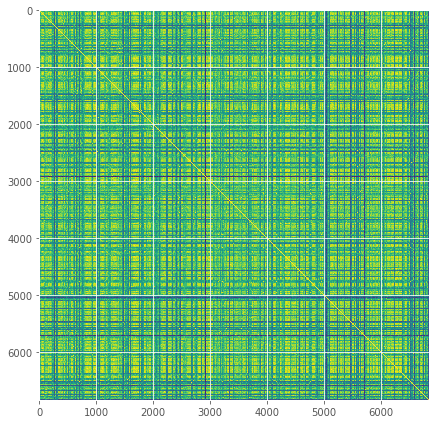

In [28]:
plt.imshow(string_kernel_faster(X_train, X_train))
plt.tight_layout()

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке.

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
coeffs = np.logspace(-2, 2, 10)
scores = []

for C in tqdm(coeffs):
    model = SVC(C=C, kernel=string_kernel_faster, random_state=RND_SEED)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print 'accuracy = {}'.format(accuracy)
    scores.append(accuracy)

 10%|█         | 1/10 [00:04<00:42,  4.76s/it]

accuracy = 0.705392371767


 20%|██        | 2/10 [00:09<00:37,  4.71s/it]

accuracy = 0.763919333626


 30%|███       | 3/10 [00:14<00:33,  4.81s/it]

accuracy = 0.716352476984


 40%|████      | 4/10 [00:19<00:29,  4.90s/it]

accuracy = 0.626698816309


 50%|█████     | 5/10 [00:24<00:24,  4.92s/it]

accuracy = 0.641604559404


 60%|██████    | 6/10 [00:28<00:18,  4.74s/it]

accuracy = 0.663743971942


 70%|███████   | 7/10 [00:33<00:13,  4.59s/it]

accuracy = 0.632178868917


 80%|████████  | 8/10 [00:37<00:09,  4.56s/it]

accuracy = 0.664839982464


 90%|█████████ | 9/10 [00:41<00:04,  4.43s/it]

accuracy = 0.629548443665


100%|██████████| 10/10 [00:46<00:00,  4.42s/it]

accuracy = 0.627137220517


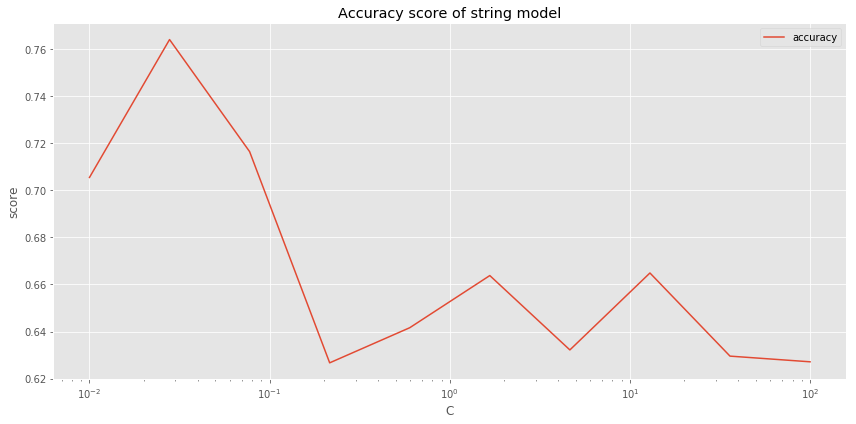

In [31]:
plt.plot(coeffs, scores)
plt.legend(['accuracy'])
plt.title('Accuracy score of string model')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('score')
plt.tight_layout()

Засчёт глобальных оптимизаций и удачного выбора ядра модели удалось достичь качества более 75% на тестовой выборке.